In [61]:
import sys
sys.path.append('/Users/amanpreetsingh/My Computer/VSCode/Market')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/Users/amanpreetsingh/My Computer/VSCode/Market/house_price_data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# Define the top 15 important features
top_15_features = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'YearBuilt',
    'YearRemodAdd',
    'GarageCars',
    'GarageArea',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'Fireplaces',
    'KitchenQual',
    'Neighborhood',
    'MSZoning',
    'LotArea'
]

# Add target variable
target = 'SalePrice'

# Filter the DataFrame
df = df[top_15_features + [target]]

# Display the filtered DataFrame
df.head()


,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,KitchenQual,Neighborhood,MSZoning,LotArea,SalePrice
0,7,1710,856,2003,2003,2,548,856,2,8,0,Gd,CollgCr,RL,8450,208500
1,6,1262,1262,1976,1976,2,460,1262,2,6,1,TA,Veenker,RL,9600,181500
2,7,1786,920,2001,2002,2,608,920,2,6,1,Gd,CollgCr,RL,11250,223500
3,7,1717,756,1915,1970,3,642,961,1,7,1,Gd,Crawfor,RL,9550,140000
4,8,2198,1145,2000,2000,3,836,1145,2,9,1,Gd,NoRidge,RL,14260,250000


In [65]:
df.isna().sum()

OverallQual     0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
GarageCars      0
GarageArea      0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
KitchenQual     0
Neighborhood    0
MSZoning        0
LotArea         0
SalePrice       0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   TotalBsmtSF   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   YearRemodAdd  1460 non-null   int64 
 5   GarageCars    1460 non-null   int64 
 6   GarageArea    1460 non-null   int64 
 7   1stFlrSF      1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  Fireplaces    1460 non-null   int64 
 11  KitchenQual   1460 non-null   object
 12  Neighborhood  1460 non-null   object
 13  MSZoning      1460 non-null   object
 14  LotArea       1460 non-null   int64 
 15  SalePrice     1460 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 182.6+ KB


In [67]:
df.describe()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1057.429452,1971.267808,1984.865753,1.767123,472.980137,1162.626712,1.565068,6.517808,0.613014,10516.828082,180921.195890
std,1.382997,525.480383,438.705324,30.202904,20.645407,0.747315,213.804841,386.587738,0.550916,1.625393,0.644666,9981.264932,79442.502883
min,1.000000,334.000000,0.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1300.000000,34900.000000
25%,5.000000,1129.500000,795.750000,1954.000000,1967.000000,1.000000,334.500000,882.000000,1.000000,5.000000,0.000000,7553.500000,129975.000000
50%,6.000000,1464.000000,991.500000,1973.000000,1994.000000,2.000000,480.000000,1087.000000,2.000000,6.000000,1.000000,9478.500000,163000.000000
75%,7.000000,1776.750000,1298.250000,2000.000000,2004.000000,2.000000,576.000000,1391.250000,2.000000,7.000000,1.000000,11601.500000,214000.000000
max,10.000000,5642.000000,6110.000000,2010.000000,2010.000000,4.000000,1418.000000,4692.000000,3.000000,14.000000,3.000000,215245.000000,755000.000000


In [68]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'SalePrice']
['KitchenQual', 'Neighborhood', 'MSZoning']


/Users/amanpreetsingh/My Computer/VSCode/Market/analysis/analysis_src/univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


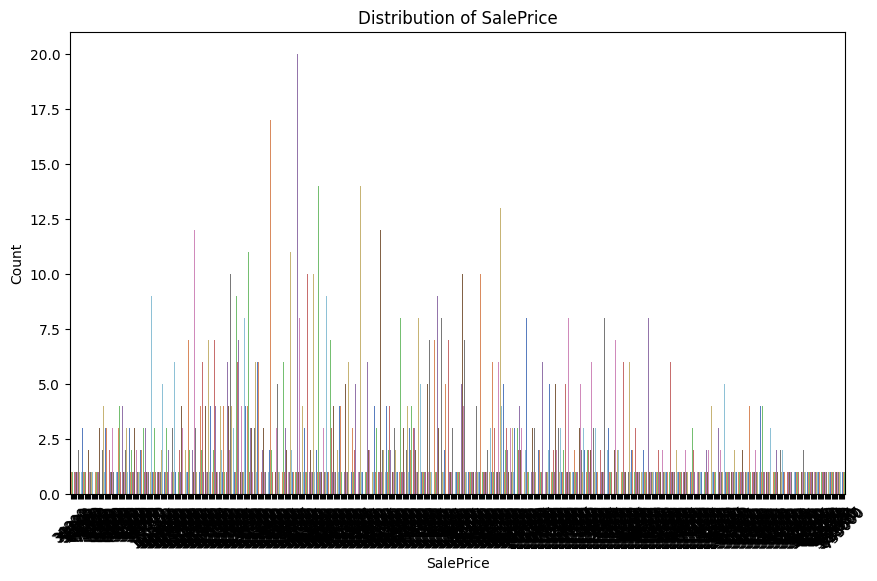

In [69]:
from analysis.analysis_src.univariate_analysis import hist_plot,count_plot
count_plot().my_plot(df,'SalePrice')

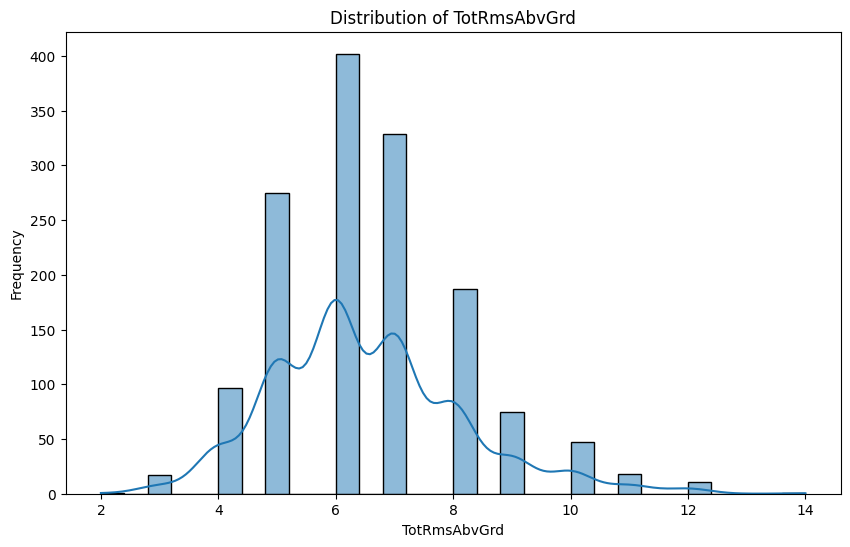

In [70]:
hist_plot().my_plot(df,'TotRmsAbvGrd')

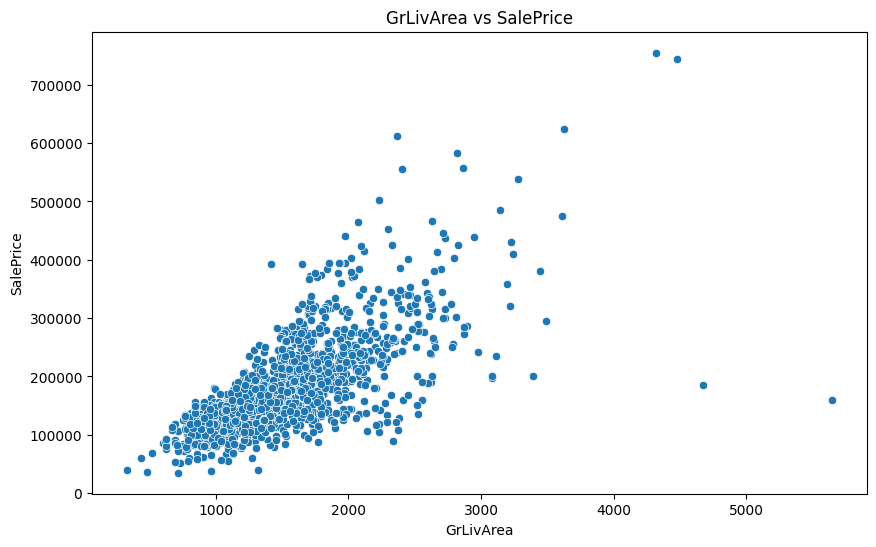

In [71]:
from analysis.analysis_src.bivariate_analysis import scatter_plot,box_plot
scatter_plot().my_plot(df,'GrLivArea','SalePrice')

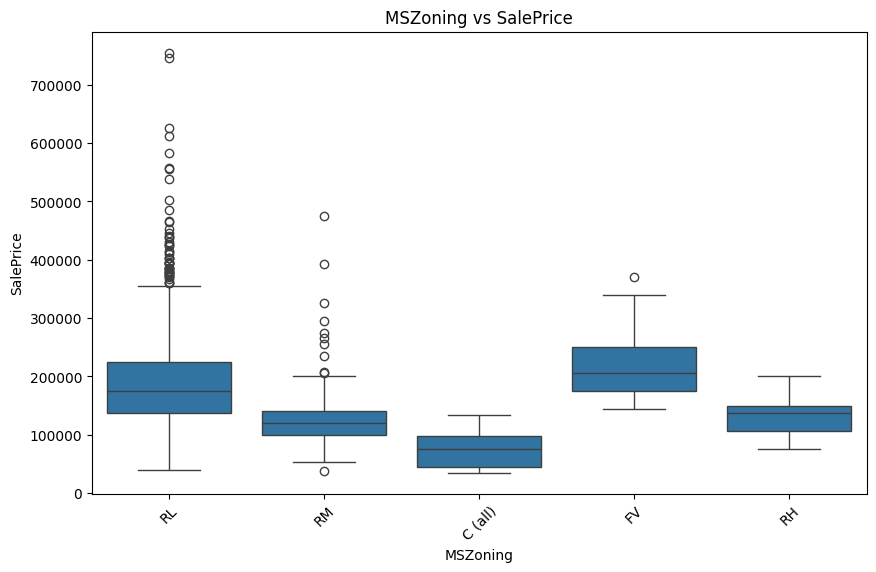

In [72]:
box_plot().my_plot(df,'MSZoning','SalePrice')

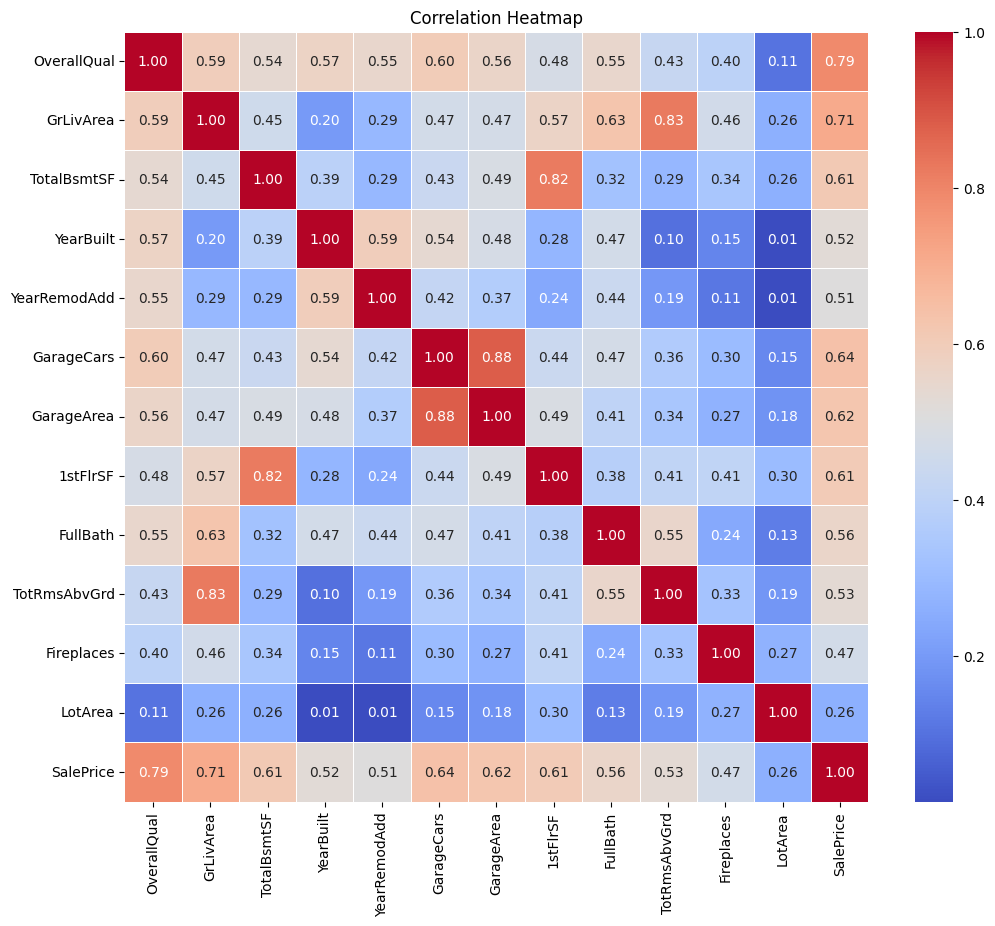

In [73]:
from analysis.analysis_src.multivariate_analysis import heatmap_pairplot

selected_features = df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 
                        'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                        'Fireplaces', 'LotArea', 'SalePrice']]
heatmap_pairplot().generate_correlation_heatmap(selected_features)

Feature	Reason for Removal

TotRmsAbvGrd	Correlation with SalePrice is only 0.53 and it’s strongly correlated with GrLivArea (0.83) – introduces redundancy.

LotArea	Correlation is very low (0.26) – lot size doesn’t consistently drive price in this dataset.

Fireplaces	Low correlation (0.47) – and not always present in all homes, so adds sparse value.


In [75]:
# List of features to drop
features_to_drop = ['TotRmsAbvGrd', 'LotArea', 'Fireplaces']

# Drop them from the dataframe
df_filtered = df.drop(columns=features_to_drop)

# Optional: confirm by printing the shape or remaining columns
print("Remaining features:", df_filtered.columns.tolist())


Remaining features: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'KitchenQual', 'Neighborhood', 'MSZoning', 'SalePrice']


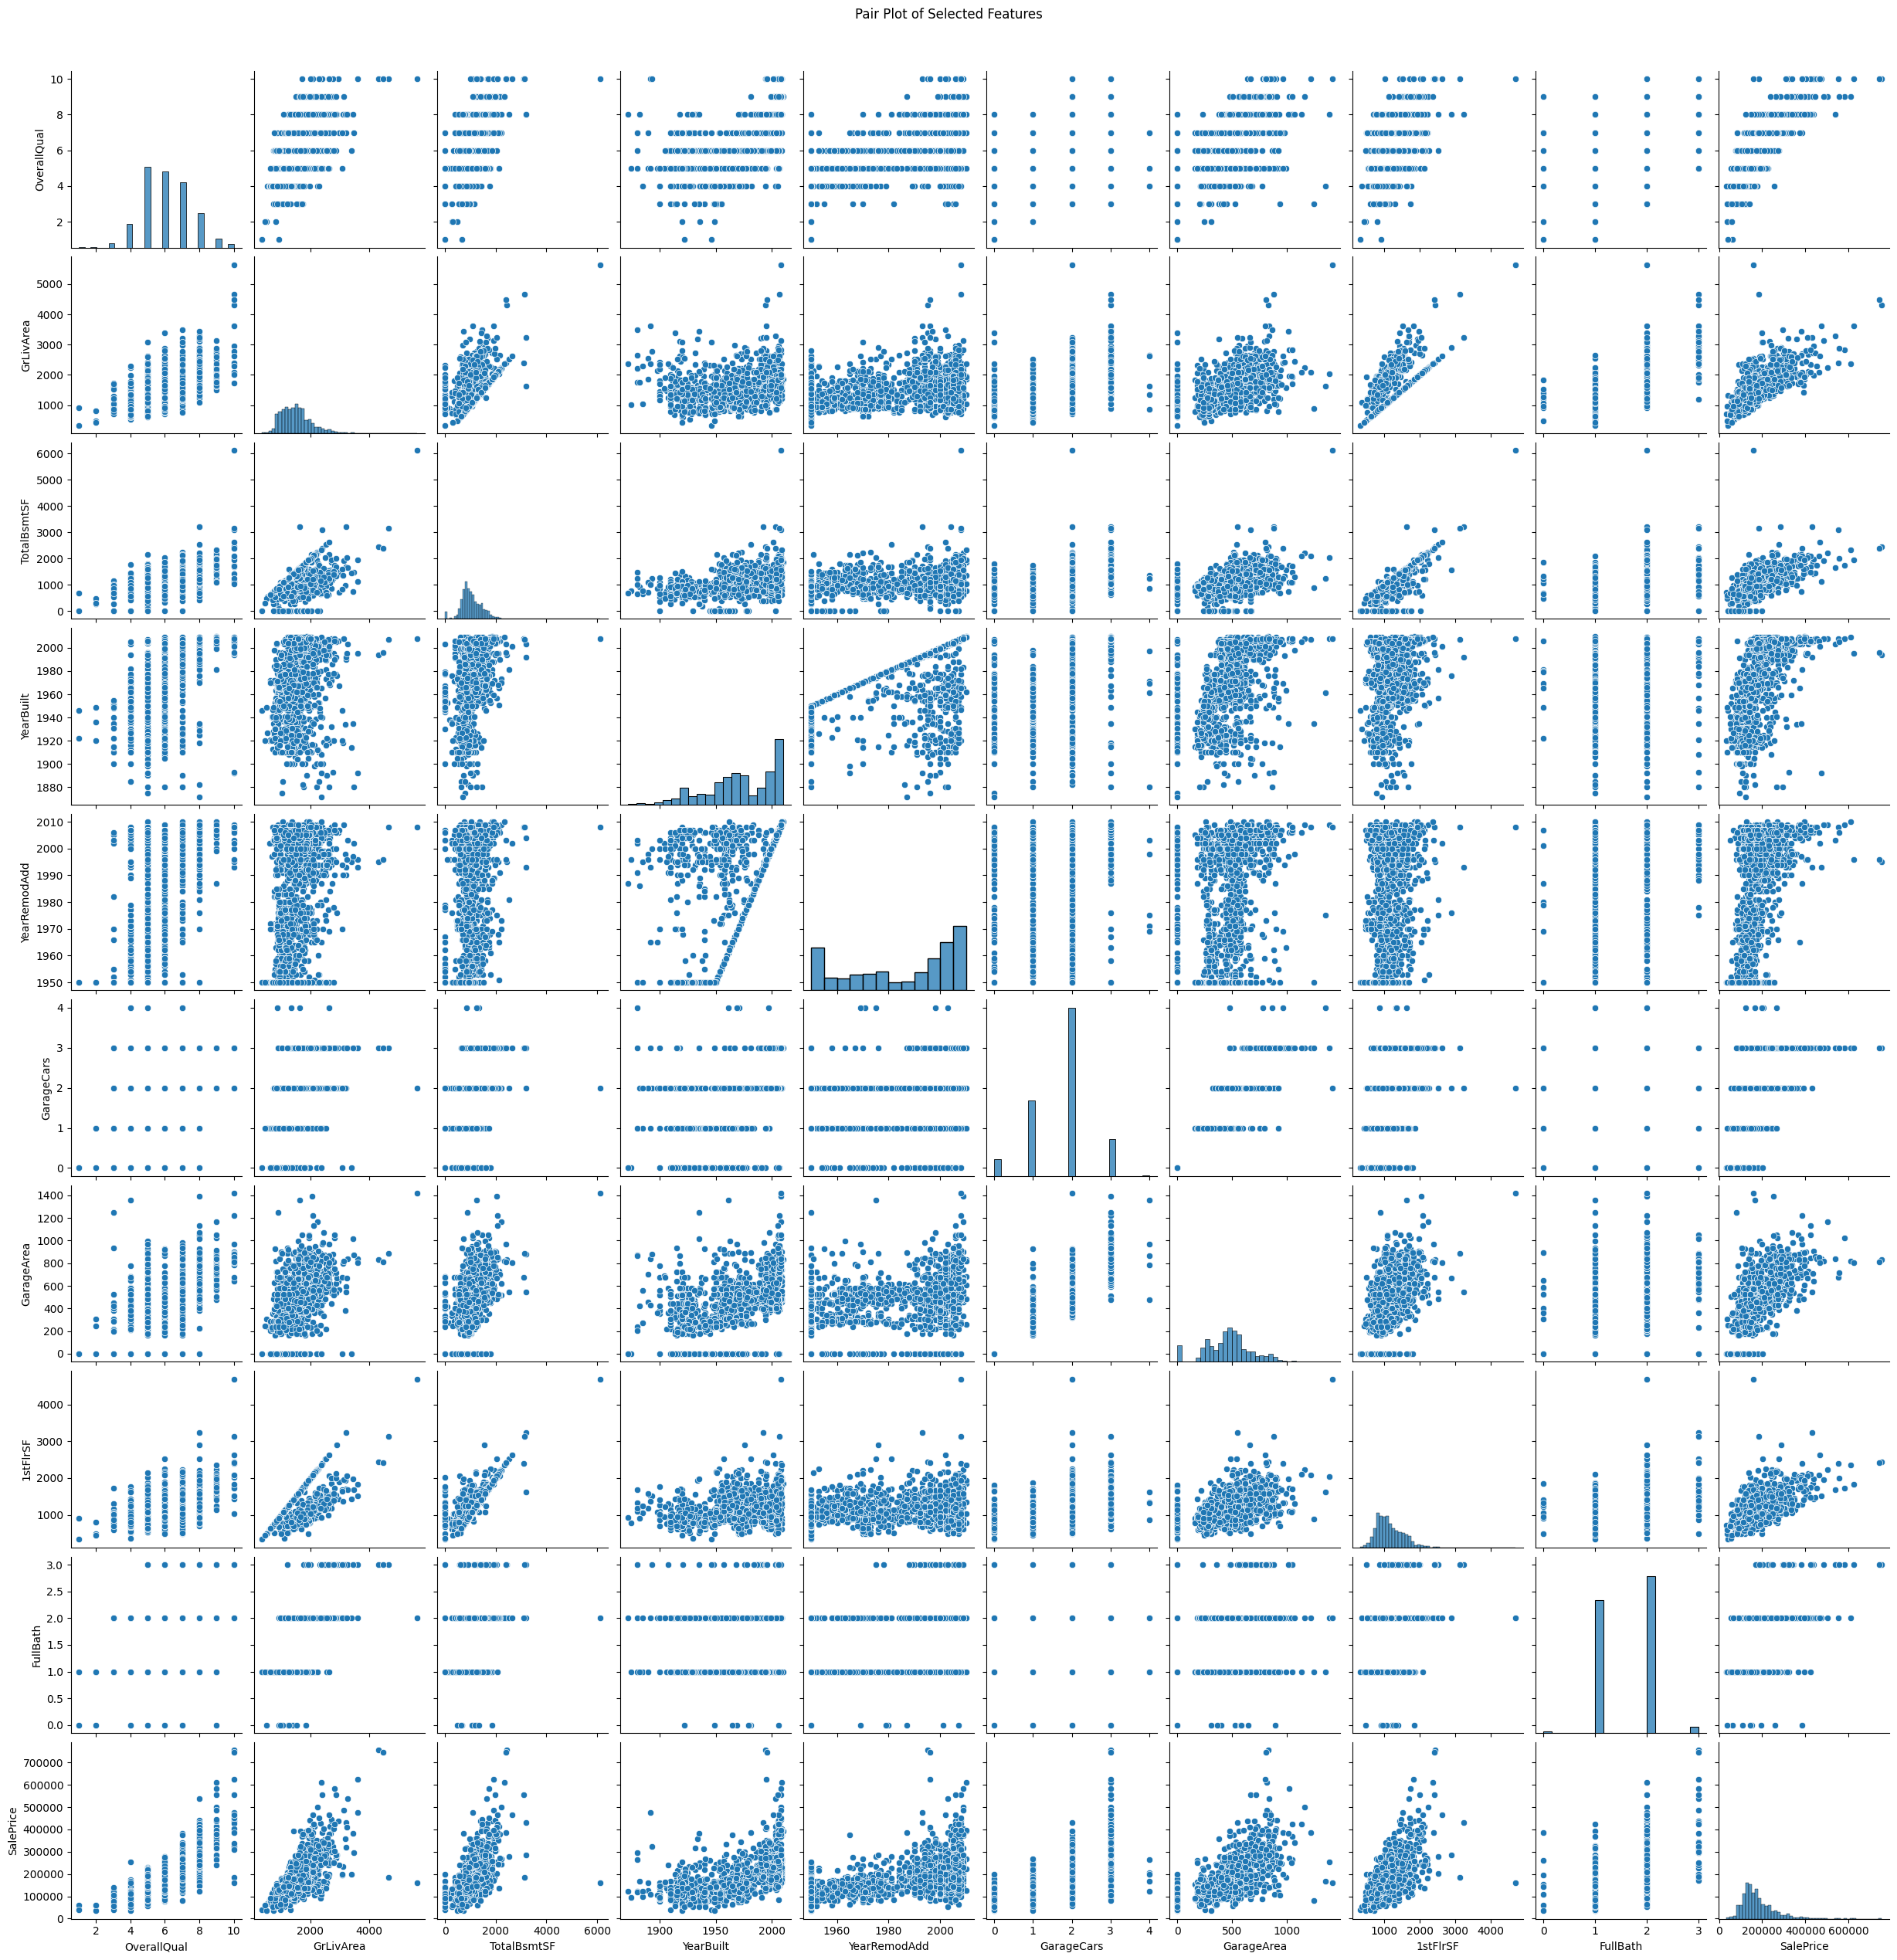

In [76]:
selected_features = df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 
                        'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 
                         'SalePrice']]
heatmap_pairplot().generate_pairplot(selected_features)

In [16]:
#FEATURE ENGINEERING
df_copy = df.copy()

In [17]:
df['STATE_modified'] = df['STATE'].str.split(',').str[0]

In [18]:
borough_mapping = {
    "Manhattan": ["New York", "New York City", "Nyc", "Ny", "Roosevelt Island", "Manhattan"],  
    "Brooklyn": ["Brooklyn", "Brooklyn Heights", "Bedford Stuyvesant", "Crown Heights", "Canarsie", 
                 "Brighton Beach", "Ditmas Park", "Old Mill Basin", "Prospect Lefferts Gardens",
                 "Brownville", "Kensington", "Stuyvesant Heights", "East Flatbush"],  
    "Queens": ["Queens", "Jackson Heights", "Elmhurst", "Woodside", "Rego Park", "Forest Hills", 
               "Briarwood", "Flushing", "Woodhaven", "Jamaica", "Richmond Hill South", "Whitestone", 
               "Ridgewood", "Rosedale", "Ozone Park", "Springfield Gardens", "Far Rockaway", "Bellerose", 
               "Bayside", "Astoria", "Floral Park", "Fresh Meadows", "Howard Beach", "Cambria Heights", 
               "Rockaway Park", "East Elmhurst", "Little Neck", "Long Island City", "Corona", "Kew Gardens", 
               "Maspeth", "Queens Village", "Richmond Hill", "Middle Village", "Saint Albans", "South Ozone Park", 
               "College Point", "Hollis", "Malba", "Glen Oaks", "Douglaston", "Sunnyside", "Arverne", "Glendale", 
               "Beechhurst", "Belle Harbor", "Kew Garden Hills", "Kew Gardens Hills","New Hyde Park"],  
    "Bronx": ["Bronx", "Bronx Ny"],  
    "Staten Island": ["Staten Island"],  
}


def map_borough(location):
    for borough, neighborhoods in borough_mapping.items():
        if location in neighborhoods:
            return borough
    return "Unknown"  # For locations that don’t fit

df['BOROUGH'] = df['STATE_modified'].apply(map_borough)

In [19]:
df.drop(columns=['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 
                 'ADMINISTRATIVE_AREA_LEVEL_2','SUBLOCALITY', 'LOCALITY', 'STREET_NAME', 
                 'LONG_NAME', 'FORMATTED_ADDRESS', 'STATE_modified','LATITUDE','LONGITUDE'], inplace=True)


In [20]:
#df[df['SUBLOCALITY'] == 'Bronx County'][['LOCALITY', 'BOROUGH']]
df = df[[col for col in df.columns if col != 'PRICE'] + ['PRICE']]

In [21]:
df

,TYPE,BEDS,BATH,PROPERTYSQFT,BOROUGH,PRICE
0,Condo for sale,2,2.000000,1400.000000,Manhattan,315000
2,House for sale,4,2.000000,2015.000000,Staten Island,260000
3,Condo for sale,3,1.000000,445.000000,Manhattan,69000
4,Townhouse for sale,7,2.373861,14175.000000,Manhattan,55000000
5,House for sale,5,2.000000,4004.000000,Brooklyn,690000
...,...,...,...,...,...,...
4796,Co-op for sale,1,1.000000,2184.207862,Manhattan,599000
4797,Co-op for sale,1,1.000000,2184.207862,Queens,245000
4798,Co-op for sale,1,1.000000,2184.207862,Manhattan,1275000
4799,Condo for sale,2,1.000000,655.000000,Queens,598125


Will apply outlier handeling transformations after splitting to avoid data leakage

In [34]:
#df.to_csv("/Users/amanpreetsingh/My Computer/VSCode/Market/extracted_data/updated_housing_data.csv", index=False)

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['PRICE'])  # Features (independent variables)
y = df['PRICE']  # Target variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
TYPE_encoder = LabelEncoder()
X_train['BOROUGH_encoded'] = TYPE_encoder.fit_transform(X_train['BOROUGH'])  # Fit on training
X_test['BOROUGH_encoded'] = TYPE_encoder.transform(X_test['BOROUGH'])  # Transform test data

In [25]:
BOROUGH_encoder = LabelEncoder()
TYPE_encoder = LabelEncoder()
X_train['TYPE_encoded'] = TYPE_encoder.fit_transform(X_train['TYPE'])  # Fit on training
X_test['TYPE_encoded'] = TYPE_encoder.transform(X_test['TYPE'])  # Transform test data

In [37]:
import logging
import numpy as np
def apply_transformation(df: pd.DataFrame,features: list) -> pd.DataFrame:
        df_transformed = df.copy()
        for feature in features:
            df_transformed[feature] = np.log1p(
                df[feature]
            )  # log1p handles log(0) by calculating log(1+x)
        return df_transformed

In [46]:
y_train_df = pd.DataFrame(y_train, columns=['PRICE'])

In [47]:
test = apply_transformation(df=y_train_df,features=['PRICE'])

In [48]:
test

,PRICE
4288,13.493928
652,14.026582
2307,12.845294
710,13.709039
4540,13.304687
...,...
4428,15.238619
468,12.466516
3094,14.151984
3774,13.457407
